<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
pip install tidytext

     |████████████████████████████████| 112kB 6.0MB/s 
  Created wheel for tidytext: filename=tidytext-0.0.1-cp36-none-any.whl size=3897 sha256=a474bfeb14e06d8cbaf7b0487c10d41d9c2cc297f6ab44d9845ff125c57de0a0
  Stored in directory: /root/.cache/pip/wheels/2a/78/d0/a7796485fd7f4d97aabcf3fa39844d80ac124416fb01993c58
Successfully built tidytext


In [2]:
pip install pymed

In [53]:
from pymed import PubMed
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from os import path
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import gensim
from gensim import corpora
from gensim.models import LsiModel, LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_texts
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_punctuation2, strip_short, strip_numeric, stem_text
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
def download_pubmed_results(years, search_text, max_results_count, file_name):
    pubmed = PubMed(tool="PubMedSearcher", email="my@email.address")
    # create dataframe for search results
    df = pd.DataFrame([], columns=['Title', 'Year'])
    # iterate through data frame
    index = 0
    # iterate through years
    for year in years:
        # filter the query by search text and year
        results = pubmed.query(f'({search_text}) AND (("{year}"[Date - Create]))', \
            max_results=max_results_count)
        # iterate through the results as per the query
        for article in results:
            article_dict = article.toDict()
            df.loc[index, "Title"] = article_dict['title']
            df.loc[index, "Year"] = year
            index = index + 1
    # export the results to a CSV
    df.to_csv(file_name, index=False)
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return ' '.join(result)
def create_document_term_matrix(df):
  documents = []
  for index, row in df.iterrows():
      all_content = preprocess(row['Title'])
      documents.append(all_content)
  # print(documents)
  # array = np.array(documents)
  # array = array.flatten()
  df = pd.DataFrame(documents, columns=['content'])
  print(df)
  vectorizer = CountVectorizer(input='content',stop_words='english', analyzer='word', token_pattern=r'\b[a-zA-Z]{2,}\b',max_features=100)
  return vectorizer.fit_transform(df['content'])
  # common_dictionary = corpora.Dictionary(documents)
  # common_dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
  # common_corpus = [common_dictionary.doc2bow(doc) for doc in documents]
  # return common_corpus, common_dictionary

In [129]:
download_pubmed_results(years=['2020'], search_text='Obesity', max_results_count=100, file_name='obesity_results.csv')
download_pubmed_results(years=['2020'], search_text='Cancer', max_results_count=100, file_name='cancer_results.csv')

In [130]:
df_obesity_results = pd.read_csv("obesity_results.csv")
df_obesity_results.dropna(inplace=True)
df_cancer_results = pd.read_csv("cancer_results.csv")
df_cancer_results.dropna(inplace=True)
final_df = pd.concat([df_obesity_results, df_cancer_results], ignore_index=True)
print(final_df)


                                                 Title  Year
0    Gestational weight gain disparities in South C...  2020
1    Complementary feeding and future health in Mex...  2020
2    Maternal-infant nutrition and development prog...  2020
3    Evaluating the pathways linking complementary ...  2020
4    Intervention during the first 1000 days in Mex...  2020
..                                                 ...   ...
194  Identification of Prognostic Model and Biomark...  2020
195  Integrative Models of Histopathological Image ...  2020
196  Detachment Activated CyPA/CD147 Induces Cancer...  2020
197  Hsa_circ_0088233 Alleviates Proliferation, Mig...  2020
198  HGF/c-Met Axis: The Advanced Development in Di...  2020

[199 rows x 2 columns]


In [131]:

dtm = create_document_term_matrix(final_df)
print(dtm)

                                               content
0    gestat weight gain dispar south carolina tempo...
1    complementari feed futur health mexico introdu...
2    matern infant nutrit develop program offspr ap...
3    evalu pathway link complementari feed practic ...
4                                 intervent day mexico
..                                                 ...
194  identif prognost model biomark cancer stem cel...
195  integr model imag featur omic data predict sur...
196  detach activ cypa induc cancer stem cell poten...
197  hsa_circ_ allevi prolifer migrat invas prostat...
198                   axi advanc develop digest cancer

[199 rows x 1 columns]
  (0, 98)	1
  (1, 39)	1
  (2, 22)	1
  (2, 63)	1
  (3, 63)	1
  (3, 32)	1
  (3, 65)	1
  (3, 28)	1
  (3, 50)	1
  (4, 49)	1
  (6, 63)	1
  (6, 30)	1
  (6, 38)	1
  (6, 82)	2
  (6, 16)	1
  (7, 6)	1
  (7, 24)	1
  (7, 76)	1
  (7, 67)	1
  (7, 0)	1
  (7, 84)	1
  (7, 8)	1
  (7, 55)	1
  (8, 97)	1
  (8, 13)	1
  :	:
  (192, 42)	1

In [132]:

df_doc_term_matrix = pd.DataFrame(dtm.toarray())

In [133]:
df_doc_term_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
196,1,0,0,0,0,0,0,0,0,1,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [134]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=2)
principalComponents = ipca.fit_transform(df_doc_term_matrix)


In [135]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

In [136]:
principalDf['label'] = np.where(principalDf.index > 99, 'cancer', 'obesity')


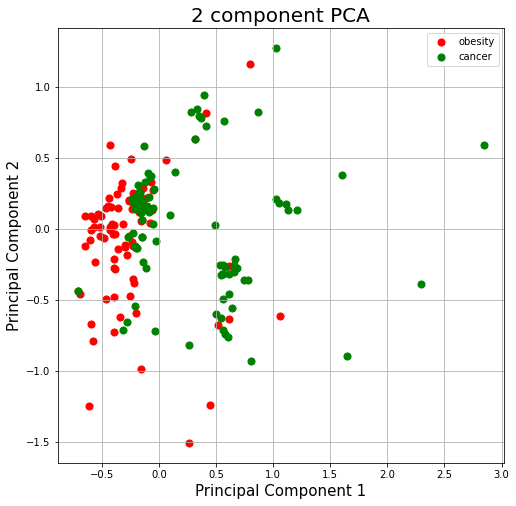

In [137]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['obesity', 'cancer']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['label'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PCA1']
               , principalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()